# Algoritmos Genéticos
Los algoritmos genéticos (AG) son una técnica de búsqueda y optimización inspirada en los principios de la evolución biológica. Emulan procesos como la **selección natural**, **cruce (recombinación)** y **mutación genética** para iterativamente mejorar un conjunto de soluciones candidatas a un problema dado.
Las soluciones óptimas aproximadas las encuentra mediante operadores como **selección, cruce, mutación y reemplazo**, aplicados sobre una **población de individuos (soluciones)** codificados como cromosomas.


## Codificación

Antes de aplicar un algoritmo genético, es necesario **representar** las soluciones como **cromosomas**, una estructura manipulable por el algoritmo.

###  Tipos de codificación:

| Tipo           | Aplicación típica                      | Ejemplo de cromosoma     | Observaciones                   |
|----------------|----------------------------------------|---------------------------|----------------------------------|
| **Binaria**    | Problemas discretos, combinatorios     | `10110` (x = 22)          | Simple, común en primeros AG     |
| **Real**       | Problemas continuos, optimización real | `[1.2, -3.5, 0.8]`        | Adecuado para funciones suaves   |
| **Permutación**| Rutas, ordenamientos (TSP, scheduling) | `[B, D, A, C]`            | Mantiene orden único             |
| **Entera**     | Parámetros discretos                   | `[3, 7, 2]`               | Útil en redes, estructuras       |
| **Árboles**    | Expresiones simbólicas (GP)            | `(x + sin(y)) * 3`        | Usado en programación genética   |


## Generación de población inicial

Se crea una **población inicial** aleatoria con `N` individuos (cromosomas).

- Tamaño típico: 20-100
- Debe haber **diversidad genética** para permitir una exploración efectiva.
- En codificación binaria o real: se generan números aleatorios.
- En permutaciones: se generan ordenamientos aleatorios válidos.


## Evaluación (función objetivo)

Cada individuo se **evalúa** mediante una **función de aptitud** (fitness function), que mide qué tan buena es su solución.

- Ejemplo: `f(x) = x * sin(x)`
- Puede requerir **normalización** si los valores son negativos o muy dispares.
- La función objetivo o **fitness** se usa para comparar individuos y seleccionar a los mejores.



## Selección

Elige a los individuos que se **reproducirán** (generarán descendencia). Se favorecen los de mayor aptitud.

### Tipos de selección

| Método              | Descripción                                        | Pros                         | Contras                         |
|---------------------|----------------------------------------------------|------------------------------|----------------------------------|
| **Ruleta**          | Probabilidad proporcional al fitness               | Fácil, estocástico           | Puede estancarse si hay dominancia |
| **Torneo**          | Se eligen `k` al azar y gana el mejor              | Simple, buen balance         | Más determinista si `k` es alto  |
| **Ranking**         | Se asignan probabilidades según orden de aptitud   | Suaviza diferencias extremas | Más lento para converger         |
| **Estocástica universal** | Uso de múltiples punteros                    | Más justo, evita duplicación | Complejo de implementar          |
| **Elitismo**        | Conserva los mejores sin cambios                   | Acelera convergencia         | Riesgo de pérdida de diversidad  |


## Cruce (recombinación)

Crea **nuevos individuos (hijos)** combinando partes de los padres.

### Tipos de cruce

#### Codificación binaria
- **Cruce en un punto**: se elige un punto y se intercambian segmentos.
- **Cruce en múltiples puntos**: más de un punto de corte.
- **Cruce uniforme**: cada bit se intercambia con cierta probabilidad.

####  Permutaciones
- **Cruce por orden (OX)**: mantiene orden relativo de genes.
- **PMX (Partially Mapped Crossover)**: respeta posiciones.
- **Cruce de ciclo (CX)**: preserva ciclos entre padres.

### Cruce

| Tipo de cruce     | Codificación     | Descripción                              | Observaciones                   |
|-------------------|------------------|------------------------------------------|----------------------------------|
| Un punto          | Binaria          | Intercambia a partir de un punto         | Simple, rápido                   |
| Uniforme          | Binaria          | Cada bit tiene probabilidad de cruzarse  | Alta variabilidad                |
| OX, PMX, CX       | Permutaciones    | Mantienen estructura de orden            | Cruciales para rutas/ordenamientos |


##  Mutación

Introduce **variación aleatoria** en los genes de los individuos, para mantener la diversidad y explorar nuevas soluciones.



## Reemplazo (actualización de la población)

Se decide **qué individuos permanecen** en la población: los padres, los hijos o una mezcla.

###  Métodos comunes:

| Estrategia           | Descripción                                      | Ventajas                      |
|----------------------|--------------------------------------------------|-------------------------------|
| **Generacional**     | Toda la población se reemplaza con los hijos    | Explora mejor                 |
| **Estacionario**     | Solo unos pocos hijos reemplazan a los peores   | Preserva buenas soluciones    |
| **Elitismo**         | Se conserva el mejor individuo                   | Asegura no perder el óptimo   |
| **μ + λ (Evolution Strategy)** | Se eligen los mejores de padres e hijos | Equilibrio entre explotación y exploración |



##  Condición de paro

El algoritmo termina cuando se cumple alguna condición:

- Número máximo de generaciones.
- Tiempo límite.
- Estancamiento (no mejora en `n` generaciones).
- Se alcanza una aptitud objetivo.


#  Resumen General del Algoritmo Genético

| Paso                  | Acción                                      | Objetivo principal                  |
|-----------------------|---------------------------------------------|-------------------------------------|
| 1. Codificación       | Representar soluciones como cromosomas      | Manipulación computacional          |
| 2. Población inicial  | Crear `N` individuos aleatorios             | Diversidad inicial                  |
| 3. Evaluación         | Calcular `fitness` de cada individuo        | Medir calidad de la solución        |
| 4. Selección          | Elegir padres                               | Favorecer mejores soluciones        |
| 5. Cruce              | Combinar padres para crear hijos            | Recombinar buenas soluciones        |
| 6. Mutación           | Alterar aleatoriamente algunos genes        | Mantener diversidad                 |
| 7. Reemplazo          | Actualizar la población con nuevos individuos| Evolucionar población               |
| 8. Paro               | Verificar criterio de terminación           | Finalizar búsqueda                  |



## Ejemplo Algoritmos Genéticos


Maximizar la función:
$$
f(x) = x \cdot \sin(x)
$$
con $x \in \{0, 1, ..., 31\}$

Codificamos $x$ como un cromosoma binario de **5 bits**.


### Paso 0: Generar población inicial

Población aleatoria con 4 cromosomas:

| Cromosoma | $x$  | $f(x)$                 |
|-----------|------|------------------------|
| 01001     | 9    | $9 \cdot \sin(9) \approx 3.709$ |
| 10110     | 22   | $22 \cdot \sin(22) \approx -0.196$ |
| 00011     | 3    | $3 \cdot \sin(3) \approx 0.423$ |
| 11100     | 28   | $28 \cdot \sin(28) \approx 7.576$  mejor


###  Paso 1: Selección

Usamos torneo entre pares:

- 01001 vs 00011 → gana 01001
- 10110 vs 11100 → gana 11100

**Padres seleccionados:** 01001 y 11100


### Paso 2: Cruce

Cruce en el tercer bit:

- Padre 1: 010|01
- Padre 2: 111|00

→ Hijos:

- 01000 → $x=8$
- 11101 → $x=29$


### Paso 3: Mutación

Mutación aleatoria: el último bit del primer hijo cambia.

- 01000 → 01001 → $x=9$
- 11101 → sin cambio


###  Paso 4: Evaluación de hijos

| Cromosoma | $x$  | $f(x)$                 |
|-----------|------|------------------------|
| 01001     | 9    | $\approx 3.709$        |
| 11101     | 29   | $29 \cdot \sin(29) \approx 19.245$  nuevo mejor



###  Paso 5: Reemplazo

Eliminamos los 2 peores de la población original:

- 10110 (22): $-0.196$
- 00011 (3): $0.423$

**Nueva población:**

| Cromosoma | $x$  | $f(x)$     |
|-----------|------|------------|
| 01001     | 9    | 3.709      |
| 11100     | 28   | 7.576      |
| 01001     | 9    | 3.709      |
| 11101     | 29   | 19.245     |



###  Paso 6: Condición de paro

Si no se cumple el criterio de paro (número de generaciones o mejora mínima), repetir desde Paso 1.



## Ejemplo con PyGAD
https://pygad.readthedocs.io/en/latest/

 Mejor cromosoma: [0 1 1 1 0] → x = 14
 f(x) = -5.4402


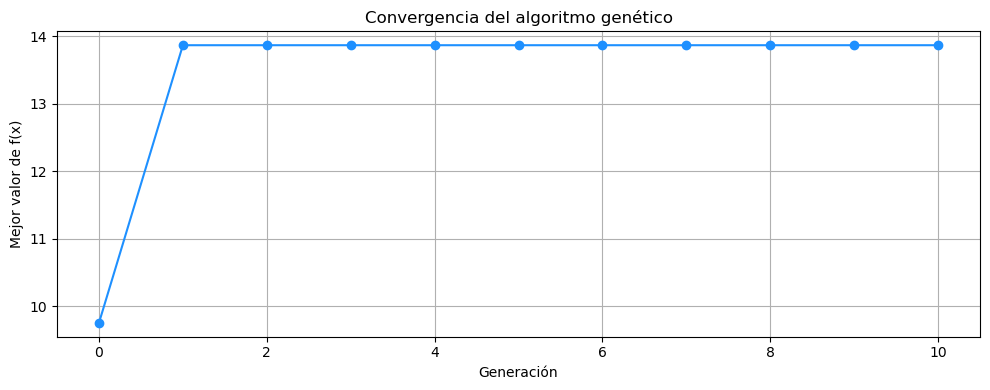

In [11]:
# Ejemplo con PyGAD
import pygad
import numpy as np
import matplotlib.pyplot as plt

#  Función de aptitud compatible con PyGAD 2.20.0+
def fitness_func(ga_instance, solution, solution_idx):
    # Convertir lista binaria a número entero
    bin_str = ''.join(str(int(g)) for g in solution)
    x = int(bin_str, 2)
    fitness = x * np.sin(x)
    return float(fitness)

#  Población inicial similar al ejemplo manual
initial_population = np.array([
    [0, 0, 1, 0, 0],  # x = 4
    [0, 1, 1, 1, 1],  # x = 15
    [1, 0, 1, 1, 0],  # x = 22
    [1, 1, 1, 1, 0],  # x = 30
], dtype=int)

#  Configuración del algoritmo genético
ga_instance = pygad.GA(
    num_generations=10,
    num_parents_mating=2,
    sol_per_pop=4,
    num_genes=5,
    initial_population=initial_population,
    fitness_func=fitness_func,
    gene_type=int,
    parent_selection_type="tournament",
    K_tournament=2,
    crossover_type="single_point",
    mutation_type="random",
    mutation_percent_genes=20,
    stop_criteria=["reach_29"]
)

#  Ejecutar el algoritmo genético
ga_instance.run()

#  Resultado final
solution, solution_fitness, solution_idx = ga_instance.best_solution()
x_best = int(''.join(map(str, solution.astype(int))), 2)
print(f" Mejor cromosoma: {solution} → x = {x_best}")
print(f" f(x) = {solution_fitness:.4f}")

#  Gráfica de convergencia
plt.figure(figsize=(10, 4))
plt.plot(ga_instance.best_solutions_fitness, marker='o', color='dodgerblue')
plt.title("Convergencia del algoritmo genético")
plt.xlabel("Generación")
plt.ylabel("Mejor valor de f(x)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
ga_instance.best_solutions_fitness

[9.754317602356753,
 13.868502979728184,
 13.868502979728184,
 13.868502979728184,
 13.868502979728184,
 13.868502979728184,
 13.868502979728184,
 13.868502979728184,
 13.868502979728184,
 13.868502979728184,
 13.868502979728184]

## Optimización evolutiva

La optimización implica la búsqueda de puntos extremos, mínimos o máximos de una función objetivo ($F(\mathbf{x})$), o de múltiples funciones objetivo, típicamente bajo ciertas restricciones ($c1, c2$), en un intervalo dado $[\mathbf{x}_i, \mathbf{x}_j]$.

$$
\min/\max F(\mathbf{x}), \quad \mathbf{x} \in [\mathbf{x}_i, \mathbf{x}_j], \quad \text{sujeto a } c1, c2.
$$

 Estos métodos refinan iterativamente un conjunto de posibles soluciones ($\{\mathbf{x}\}_{\text{Sol}}$), conocido como población, a lo largo de múltiples generaciones. Cada elemento de la población ($\mathbf{x}_i$) representa una posible solución al problema y reside en un espacio de \(N\) dimensiones, es decir,

$$
\{\mathbf{x}\}_{\text{Sol}} = \{\mathbf{x}_1, \ldots, \mathbf{x}_s\}, \quad \mathbf{x}_i = [x_{i1}, x_{i2}, \ldots, x_{iN}].
$$

Mediante mejoras repetidas, los EAs ayudan a identificar soluciones óptimas o cercanas a la óptima para problemas complejos.  
La mayoría de estos métodos presentan un comportamiento estocástico y pueden estar inspirados en la naturaleza o en la biología, tomando motivación de la evolución genética de los organismos vivos. Los métodos basados en enjambres, como la optimización por enjambre de partículas (PSO), son algoritmos socio-inspirados y otros no bio-inspirados, como los basados en física, química y matemáticas, entre otros.

## Algorítmo Evolutivo Diferencial (DE)

El algoritmo de Evolución Diferencial (DE) es uno de los algoritmos de optimización más populares para resolver problemas complejos. Es un algoritmo evolutivo (EA) y un método basado en poblaciones. Propuesto originalmente por Storn y Price en 1997, DE es conocido por su simplicidad y eficiencia en la optimización global sobre espacios continuos. El algoritmo funciona mejorando iterativamente soluciones candidatas basándose en operadores de mutación, cruce y selección. En comparación con otros algoritmos evolutivos, DE ha demostrado un desempeño superior en el manejo de funciones no lineales y multimodales. Su efectividad ha sido ampliamente estudiada en la comunidad de optimización, con aplicaciones en diversos problemas de ingeniería y ciencia.

El algoritmo DE sigue los siguientes pasos:

1. **Inicialización:** Se genera aleatoriamente una población de $N_p$ soluciones candidatas:

   $$
   \mathbf{x}_i^0 \sim U(\mathbf{x}_{\min}, \mathbf{x}_{\max}), \quad i = 1, 2, \dots, N_p.
   $$

2. **Mutación:** Se genera una nueva solución candidata (vector mutante) sumando la diferencia ponderada entre dos individuos seleccionados al azar ($\mathbf{x}_{r_1}, \mathbf{x}_{r_2}$) a un tercer individuo ($\mathbf{x}_{r_3}$):

   $$
   \mathbf{x}' = \mathbf{x}_{r_3} + G(\mathbf{x}_{r_1} - \mathbf{x}_{r_2}),
   $$

   donde $r_1 \neq r_2 \neq r_3$ son enteros aleatorios y $G \in [0,1]$ es el factor de escala positivo real.

3. **Cruce:** Se genera el vector de prueba recombinando el vector mutante con el individuo original:

   $$
   \mathbf{o}_{i,j} = \begin{cases}
       \mathbf{x}'_{i,j}, & \text{si } rand_j \leq C_r \text{ o } j = j_{rand}, \\
       \mathbf{x}_{i,j}^t, & \text{en otro caso}.
   \end{cases}
   $$

   La probabilidad de cruce $C_r \in [0,1]$ controla la proporción de mezcla.

4. **Selección:** Se compara el vector de prueba con el individuo original, reteniendo el que tenga mejor valor de la función objetivo:

   $$
   \mathbf{x}_i^{t+1} = \begin{cases}
       \mathbf{o}_i, & \text{si } F_k(\mathbf{o}_i) \leq F_k(\mathbf{x}_i^t), \\
       \mathbf{x}_i^t, & \text{en otro caso}.
   \end{cases}
   $$

5. **Iteración:** Se repiten los pasos 2-4 hasta que se cumpla un criterio de parada.

6. **Análisis estadístico:** El algoritmo se ejecuta múltiples veces ($R$ ejecuciones) para analizar variaciones en el desempeño. En este caso, se elige $R=32$.

Sicpy cuenta con una version de este algoritmo [DE](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html).

## Algoritmo de Optimización por Enjambre de Partículas (PSO)

La Optimización por Enjambre de Partículas (PSO, por sus siglas en inglés Particle Swarm Optimization) es un algoritmo metaheurístico inspirado en el comportamiento colectivo de enjambres naturales, como bandadas de aves o bancos de peces \cite{Kennedy95,Eberhart95}. PSO es un método basado en población que busca soluciones óptimas en espacios de búsqueda multidimensionales mediante la colaboración y competencia entre partículas (soluciones candidatas).

Cada partícula en el enjambre representa una posible solución al problema y se mueve en el espacio de búsqueda ajustando su posición y velocidad en función de su experiencia propia y la experiencia del grupo.

### Principios básicos

- **Posición** $\mathbf{x}_i^t$ de la partícula $i$ en la iteración $t$: representa una solución candidata en el espacio de búsqueda de dimensión \(N\).

- **Velocidad** $\mathbf{v}_i^t$: vector que determina la dirección y magnitud del movimiento de la partícula $i$ en la iteración $t$.

- **Mejor posición individual** $\mathbf{p}_i$: mejor posición encontrada hasta el momento por la partícula $i$ (memoria personal).

- **Mejor posición global** $\mathbf{g}$: mejor posición encontrada por cualquier partícula en el enjambre (memoria colectiva).

### Actualización de partículas

En cada iteración, las partículas actualizan su velocidad y posición con base en tres componentes: inercia, atracción hacia su mejor posición individual y atracción hacia la mejor posición global encontrada.

Las ecuaciones de actualización para la velocidad y posición son:

$$
\mathbf{v}_i^{t+1} = \omega \mathbf{v}_i^{t} + c_1 r_1 (\mathbf{p}_i - \mathbf{x}_i^{t}) + c_2 r_2 (\mathbf{g} - \mathbf{x}_i^{t}),
$$

$$
\mathbf{x}_i^{t+1} = \mathbf{x}_i^{t} + \mathbf{v}_i^{t+1},
$$

donde:

- $\omega$ es el coeficiente de inercia que controla la influencia de la velocidad previa.
- $c_1$ y $c_2$ son coeficientes de aceleración que ponderan la atracción hacia la mejor posición personal y global, respectivamente.
- $r_1$ y $r_2$ son números aleatorios uniformes en $[0,1]$, que introducen estocasticidad para explorar el espacio de búsqueda.

### Algoritmo PSO general

1. **Inicialización:** Se inicializa aleatoriamente una población de partículas con posiciones $\mathbf{x}_i^0$ y velocidades $\mathbf{v}_i^0$ dentro del espacio de búsqueda.

2. **Evaluación:** Se evalúa la función objetivo $F(\mathbf{x}_i^t)$ para cada partícula.

3. **Actualización de memoria:**
   - Si la posición actual $\mathbf{x}_i^t$ es mejor que la mejor posición personal previa $\mathbf{p}_i$, se actualiza $\mathbf{p}_i = \mathbf{x}_i^t$.
   - Si alguna partícula encuentra una mejor posición que la mejor global $\mathbf{g}$, se actualiza $\mathbf{g}$.

4. **Actualización de velocidad y posición:** Se actualizan $\mathbf{v}_i^{t+1}$ y $\mathbf{x}_i^{t+1}$ con las fórmulas anteriores.

5. **Iteración:** Se repiten los pasos 2 a 4 hasta cumplir el criterio de parada (número máximo de iteraciones o convergencia).

6. **Resultado:** La mejor posición global $\mathbf{g}$ se considera la solución óptima aproximada.

Este algoritmo junto a algunos más se puede obtener en la siguiente librería [Swarmpackagepy](https://github.com/SISDevelop/SwarmPackagePy/tree/master)

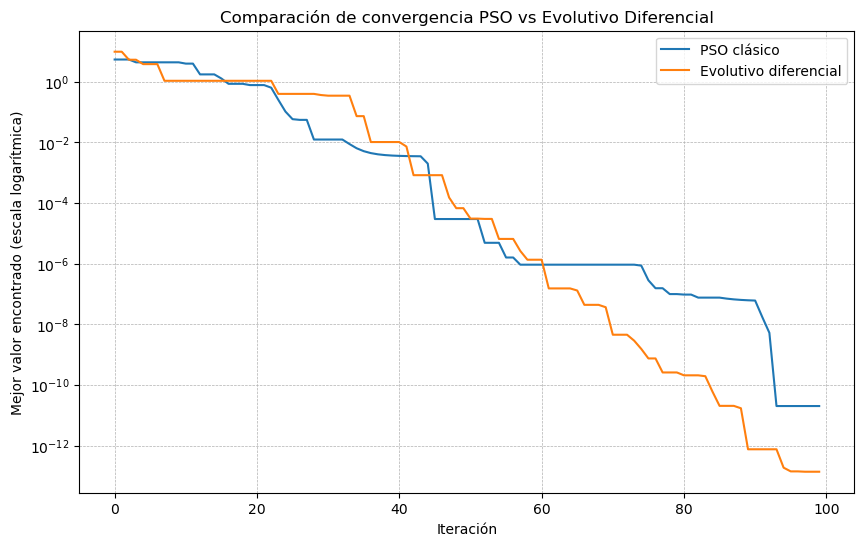

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Función objetivo (Sphere)
#def funcion_objetivo(x):
#    return np.sum(x**2)
# Función objetivo: Rastrigin
def funcion_objetivo(x):
    A = 10
    return A * len(x) + np.sum(x**2 - A * np.cos(2 * np.pi * x))

# PSO
def pso_clasico(func, dim, n_particulas=30, iter_max=100,
                w=0.7, c1=1.5, c2=1.5, limite_min=-10, limite_max=10):
    X = np.random.uniform(limite_min, limite_max, (n_particulas, dim))
    V = np.zeros_like(X)
    p_best = X.copy()
    p_best_val = np.array([func(x) for x in X])
    g_best = p_best[np.argmin(p_best_val)]
    g_best_val = np.min(p_best_val)
    historial = []

    for _ in range(iter_max):
        r1 = np.random.rand(n_particulas, dim)
        r2 = np.random.rand(n_particulas, dim)

        V = w*V + c1*r1*(p_best - X) + c2*r2*(g_best - X)
        X = X + V
        X = np.clip(X, limite_min, limite_max)

        fitness = np.array([func(x) for x in X])

        mejor_personal_mask = fitness < p_best_val
        p_best[mejor_personal_mask] = X[mejor_personal_mask]
        p_best_val[mejor_personal_mask] = fitness[mejor_personal_mask]

        min_idx = np.argmin(p_best_val)
        if p_best_val[min_idx] < g_best_val:
            g_best_val = p_best_val[min_idx]
            g_best = p_best[min_idx]

        historial.append(g_best_val)
    return g_best, g_best_val, historial

# Evolutivo diferencial
def diferencial_evolutivo(func, dim, n_poblacion=30, iter_max=100,
                          F=0.8, CR=0.9, limite_min=-10, limite_max=10):
    poblacion = np.random.uniform(limite_min, limite_max, (n_poblacion, dim))
    fitness = np.array([func(ind) for ind in poblacion])
    best_idx = np.argmin(fitness)
    best_sol = poblacion[best_idx]
    best_val = fitness[best_idx]
    historial = []

    for _ in range(iter_max):
        for i in range(n_poblacion):
            idxs = list(range(n_poblacion))
            idxs.remove(i)
            a, b, c = np.random.choice(idxs, 3, replace=False)

            mutant = poblacion[a] + F * (poblacion[b] - poblacion[c])
            mutant = np.clip(mutant, limite_min, limite_max)

            cross_points = np.random.rand(dim) < CR
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dim)] = True
            trial = np.where(cross_points, mutant, poblacion[i])

            f_trial = func(trial)
            if f_trial < fitness[i]:
                poblacion[i] = trial
                fitness[i] = f_trial
                if f_trial < best_val:
                    best_val = f_trial
                    best_sol = trial

        historial.append(best_val)
    return best_sol, best_val, historial


# Comparación de convergencia
dim = 2
iter_max = 100

_, _, hist_pso = pso_clasico(funcion_objetivo, dim, iter_max=iter_max)
_, _, hist_de = diferencial_evolutivo(funcion_objetivo, dim, iter_max=iter_max)

plt.figure(figsize=(10,6))
plt.plot(hist_pso, label="PSO clásico")
plt.plot(hist_de, label="Evolutivo diferencial")
plt.yscale('log')
plt.xlabel("Iteración")
plt.ylabel("Mejor valor encontrado (escala logarítmica)")
plt.title("Comparación de convergencia PSO vs Evolutivo Diferencial")
plt.legend()
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()


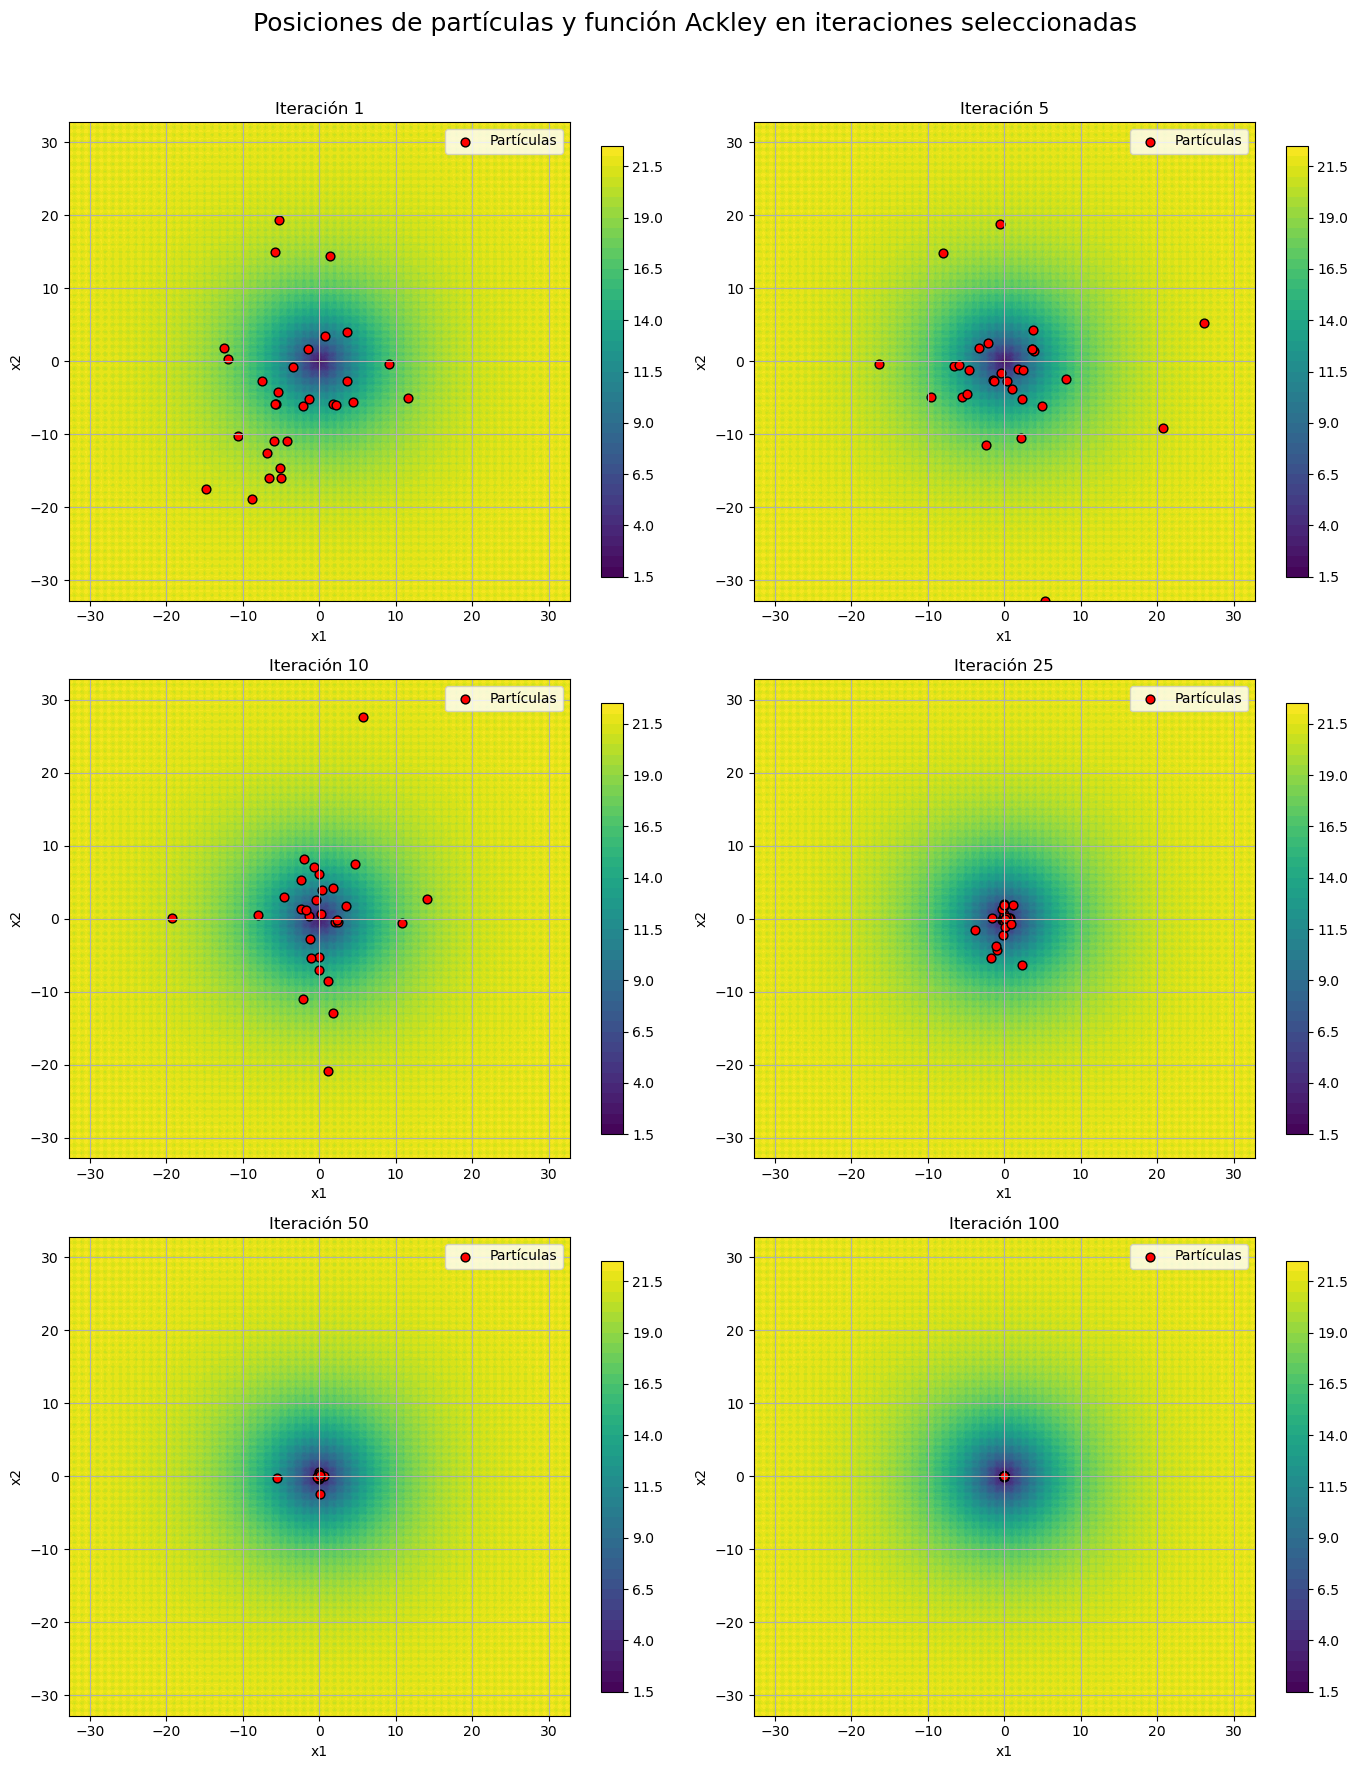

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Función Ackley (2D)
def funcion_ackley(x):
    a = 20
    b = 0.2
    c = 2 * np.pi
    d = len(x)
    sum_sq = np.sum(x**2)
    sum_cos = np.sum(np.cos(c * x))
    term1 = -a * np.exp(-b * np.sqrt(sum_sq / d))
    term2 = -np.exp(sum_cos / d)
    return term1 + term2 + a + np.exp(1)

# PSO clásico con historial de posiciones
def pso_clasico_con_posiciones(func, dim=2, n_particulas=30, iter_max=100,
                              w=0.7, c1=1.5, c2=1.5, limite_min=-32.768, limite_max=32.768):
    X = np.random.uniform(limite_min, limite_max, (n_particulas, dim))
    V = np.zeros_like(X)
    p_best = X.copy()
    p_best_val = np.array([func(x) for x in X])
    g_best = p_best[np.argmin(p_best_val)]
    g_best_val = np.min(p_best_val)

    historial_valores = []
    historial_posiciones = []

    for iter in range(iter_max):
        r1 = np.random.rand(n_particulas, dim)
        r2 = np.random.rand(n_particulas, dim)

        V = w*V + c1*r1*(p_best - X) + c2*r2*(g_best - X)
        X = X + V
        X = np.clip(X, limite_min, limite_max)

        fitness = np.array([func(x) for x in X])

        mejor_personal_mask = fitness < p_best_val
        p_best[mejor_personal_mask] = X[mejor_personal_mask]
        p_best_val[mejor_personal_mask] = fitness[mejor_personal_mask]

        min_idx = np.argmin(p_best_val)
        if p_best_val[min_idx] < g_best_val:
            g_best_val = p_best_val[min_idx]
            g_best = p_best[min_idx]

        historial_valores.append(g_best_val)
        historial_posiciones.append(X.copy())

    return g_best, g_best_val, historial_valores, historial_posiciones

# Parámetros
dim = 2
iter_max = 100
n_particulas = 30
limite_min, limite_max = -32.768, 32.768

# Ejecutar PSO
_, _, hist_vals, hist_pos = pso_clasico_con_posiciones(funcion_ackley, dim=dim, n_particulas=n_particulas, iter_max=iter_max)

# Iteraciones para graficar
x_plot = [1, 5, 10, 25, 50, 100]

# Crear malla para función Ackley
x = np.linspace(limite_min, limite_max, 200)
y = np.linspace(limite_min, limite_max, 200)
X_grid, Y_grid = np.meshgrid(x, y)
Z = np.array([funcion_ackley(np.array([xi, yi])) for xi, yi in zip(np.ravel(X_grid), np.ravel(Y_grid))])
Z = Z.reshape(X_grid.shape)

# Graficar
fig, axs = plt.subplots(3, 2, figsize=(14,18))

for i, iter_num in enumerate(x_plot):
    ax = axs.flat[i]

    # Contorno de la función
    cs = ax.contourf(X_grid, Y_grid, Z, levels=50, cmap='viridis')
    fig.colorbar(cs, ax=ax, shrink=0.9)

    # Posiciones de partículas en la iteración (index = iter_num-1)
    posiciones = hist_pos[iter_num-1]
    ax.scatter(posiciones[:,0], posiciones[:,1], color='red', s=40, edgecolors='black', label="Partículas")

    ax.set_title(f"Iteración {iter_num}")
    ax.set_xlim(limite_min, limite_max)
    ax.set_ylim(limite_min, limite_max)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.legend()
    ax.grid(True)

plt.suptitle("Posiciones de partículas y función Ackley en iteraciones seleccionadas", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



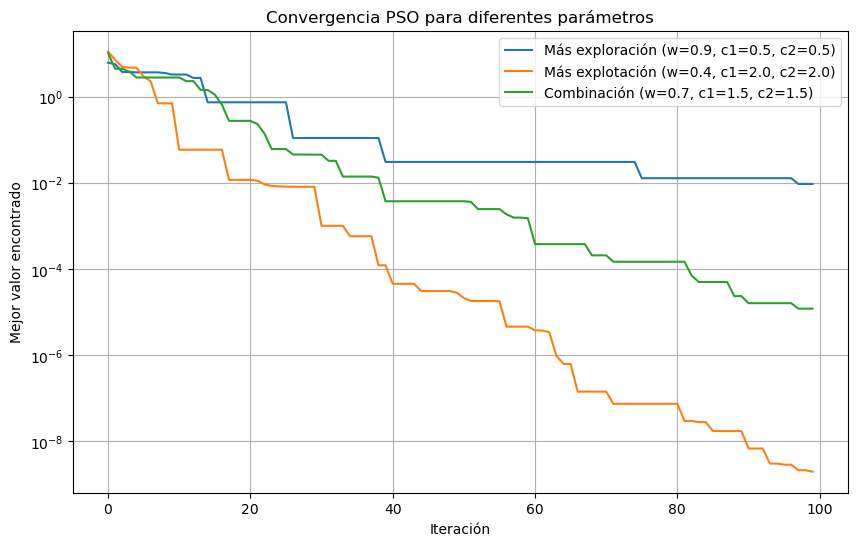

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Función Ackley (2D)
def funcion_ackley(x):
    a = 20
    b = 0.2
    c = 2 * np.pi
    d = len(x)
    sum_sq = np.sum(x**2)
    sum_cos = np.sum(np.cos(c * x))
    term1 = -a * np.exp(-b * np.sqrt(sum_sq / d))
    term2 = -np.exp(sum_cos / d)
    return term1 + term2 + a + np.exp(1)

# PSO con historial de valores para convergencia
def pso_convergencia(func, dim=2, n_particulas=30, iter_max=100, w=0.7, c1=1.5, c2=1.5,
                     limite_min=-32.768, limite_max=32.768):
    X = np.random.uniform(limite_min, limite_max, (n_particulas, dim))
    V = np.zeros_like(X)
    p_best = X.copy()
    p_best_val = np.array([func(x) for x in X])
    g_best = p_best[np.argmin(p_best_val)]
    g_best_val = np.min(p_best_val)

    historial_valores = []

    for _ in range(iter_max):
        r1 = np.random.rand(n_particulas, dim)
        r2 = np.random.rand(n_particulas, dim)

        V = w*V + c1*r1*(p_best - X) + c2*r2*(g_best - X)
        X = X + V
        X = np.clip(X, limite_min, limite_max)

        fitness = np.array([func(x) for x in X])

        mejor_personal_mask = fitness < p_best_val
        p_best[mejor_personal_mask] = X[mejor_personal_mask]
        p_best_val[mejor_personal_mask] = fitness[mejor_personal_mask]

        min_idx = np.argmin(p_best_val)
        if p_best_val[min_idx] < g_best_val:
            g_best_val = p_best_val[min_idx]
            g_best = p_best[min_idx]

        historial_valores.append(g_best_val)

    return historial_valores

# Parámetros comunes
dim = 2
iter_max = 100
n_particulas = 30
limite_min, limite_max = -32.768, 32.768

# Caso 1: Más exploración (w grande, c1 y c2 pequeños)
valores_exploracion = pso_convergencia(funcion_ackley, dim, n_particulas, iter_max, w=0.9, c1=0.5, c2=0.5)

# Caso 2: Más explotación (w pequeño, c1 y c2 grandes)
valores_explotacion = pso_convergencia(funcion_ackley, dim, n_particulas, iter_max, w=0.4, c1=2.0, c2=2.0)

# Caso 3: Combinación equilibrada (valores intermedios)
valores_equilibrio = pso_convergencia(funcion_ackley, dim, n_particulas, iter_max, w=0.7, c1=1.5, c2=1.5)

# Graficar convergencia
plt.figure(figsize=(10,6))
plt.plot(valores_exploracion, label="Más exploración (w=0.9, c1=0.5, c2=0.5)")
plt.plot(valores_explotacion, label="Más explotación (w=0.4, c1=2.0, c2=2.0)")
plt.plot(valores_equilibrio, label="Combinación (w=0.7, c1=1.5, c2=1.5)")
plt.yscale('log')
plt.xlabel("Iteración")
plt.ylabel("Mejor valor encontrado")
plt.title("Convergencia PSO para diferentes parámetros")
plt.legend()
plt.grid(True)
plt.show()


## Ajuste de Curvas con Evolutivo diferencial

El ajuste de curvas es un proceso para encontrar los parámetros de un modelo que mejor describan un conjunto de datos experimentales. En este ejemplo, utilizamos el algoritmo de **Optimización por Evolución Diferencial (Differential Evolution, DE)** disponible en la librería `scipy.optimize` para ajustar una función no lineal.

El modelo elegido es:

$$
y = a \sin(b x) + c
$$

donde \(a\), \(b\) y \(c\) son parámetros desconocidos que queremos estimar.

### Procedimiento

1. Se generan datos sintéticos con ruido basados en valores conocidos de los parámetros \(a\), \(b\) y \(c\).
2. Se define la función objetivo como el error cuadrático medio (MSE) entre los datos reales y los valores predichos por el modelo.
3. Se utiliza el algoritmo de **differential_evolution** para minimizar esta función objetivo, buscando los mejores parámetros dentro de ciertos límites.
4. Finalmente, se grafican los datos, la función verdadera y el ajuste obtenido para visualizar la calidad del ajuste.

Este método es especialmente útil para problemas con funciones objetivo no lineales y no diferenciables, ya que DE no requiere derivadas y explora de manera global el espacio de parámetros.


Parámetros ajustados: a=2.514, b=1.299, c=0.470


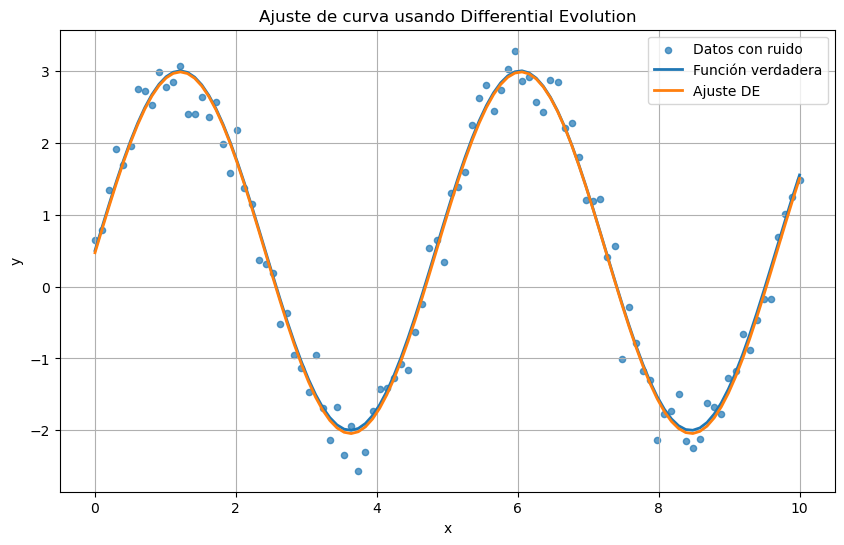

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

# Datos sintéticos
np.random.seed(42)
x_data = np.linspace(0, 10, 100)
# Parámetros reales
a_real, b_real, c_real = 2.5, 1.3, 0.5
y_true = a_real * np.sin(b_real * x_data) + c_real
# Añadimos ruido
noise = 0.3 * np.random.normal(size=x_data.size)
y_data = y_true + noise

# Modelo para ajuste
def modelo(params, x):
    a, b, c = params
    return a * np.sin(b * x) + c

# Función objetivo: error cuadrático medio
def objetivo(params):
    y_pred = modelo(params, x_data)
    return np.mean((y_data - y_pred)**2)

# Límites para los parámetros: a, b, c
bounds = [(0, 5),   # a
          (0, 3),   # b
          (-1, 1)]  # c

# Optimización con Differential Evolution
resultado = differential_evolution(objetivo, bounds)

# Parámetros ajustados
a_fit, b_fit, c_fit = resultado.x
print(f"Parámetros ajustados: a={a_fit:.3f}, b={b_fit:.3f}, c={c_fit:.3f}")

# Graficar resultados
plt.figure(figsize=(10,6))
plt.scatter(x_data, y_data, label='Datos con ruido', s=20, alpha=0.7)
plt.plot(x_data, y_true, label='Función verdadera', linewidth=2)
plt.plot(x_data, modelo(resultado.x, x_data), label='Ajuste DE', linewidth=2)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste de curva usando Differential Evolution')
plt.grid(True)
plt.show()


In [31]:
resultado.x

array([2.51440872, 1.2989128 , 0.46968803])

# Evaluación de las soluciones

Cuando se aplica un algoritmo evolutivo para resolver un problema, hay dos niveles de análisis que permiten evaluar **la confiabilidad de la solución**:



## 1. Estabilidad del algoritmo (convergencia repetible)

Se refiere a si el algoritmo produce **resultados similares en múltiples ejecuciones independientes**.


- Ejecutar el algoritmo **varias veces** con diferentes semillas aleatorias.
- Calcular **media**, **desviación estándar** y **rango** de los valores finales.
- Un algoritmo es más **estable** si su **desviación estándar es baja**.

###  Ejemplo de métrica:
- Media del valor objetivo final: $\bar{f}$
- Desviación estándar: $\sigma_f$
- Coeficiente de variación: $$CV = \frac{\sigma_f}{\bar{f}}$$


## 2. Significancia estadística de la calidad de la solución

Esto responde a la pregunta: *¿la solución encontrada es significativamente mejor que una referencia o que lo que se espera por azar?*

###  Posibles enfoques:

#### a) Comparación contra un valor de referencia (*benchmark*)

- Si se conoce el **óptimo teórico** o un **valor objetivo aceptable**, se puede usar un **test de hipótesis de una muestra**:
  
  - **Test t de una muestra**:
    - $H_0$: la media de las soluciones es igual al valor de referencia.
  
  - **Test de Wilcoxon de una muestra** (si los datos no son normales).

#### b) Intervalo de confianza del valor medio

- Calcular un **intervalo de confianza** para la media del valor de la función objetivo.
- Si este intervalo es **estrecho** y/o **cercano al óptimo conocido**, se puede considerar una solución confiable.

$$
IC = \left[ \bar{f} \pm t_{\alpha/2, n-1} \cdot \frac{\sigma_f}{\sqrt{n}} \right]
$$

- $t_{\alpha/2, n-1}$: valor t crítico
- $\sigma_f$: desviación estándar
- $n$: número de ejecuciones

####  c) Comparación contra soluciones aleatorias

- Ejecutar una versión aleatoria del algoritmo (sin operadores inteligentes) y comparar con el algoritmo real.
- Usar test *t* o Wilcoxon para demostrar que el algoritmo **produce soluciones mejores que el azar**.



## 3.  Métricas adicionales útiles

- **Tasa de éxito**: % de ejecuciones que alcanzan una solución dentro de una tolerancia del óptimo.
- **Número de evaluaciones hasta la mejor solución**.
- **Área bajo la curva de convergencia** (AUC).


Un algoritmo encuentra una **solución confiable y buena** si:

- Produce soluciones similares en ejecuciones independientes (baja varianza).
- Su desempeño estadísticamente supera el de otros algoritmos o soluciones aleatorias.
- La solución está dentro de un intervalo de confianza estrecho cerca del valor óptimo.
- Tiene alta tasa de éxito o buena eficiencia en evaluaciones.

Media de f(x, y): 0.0003
Desviación estándar: 0.0006
IC 95%: IC = [ 6.477615108642457e-05,0.0005070993154700646] 


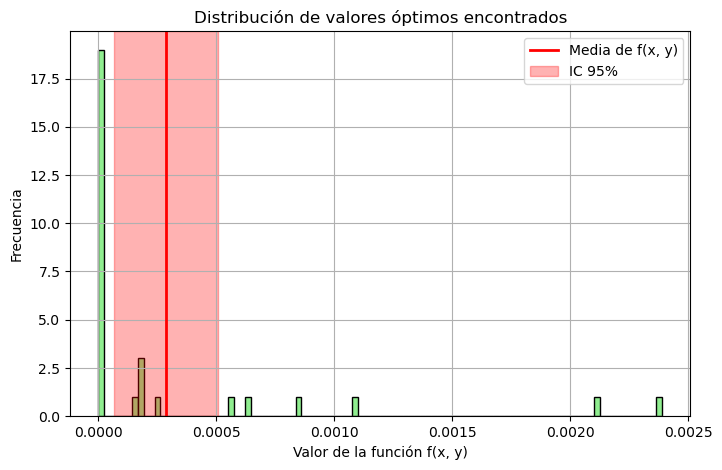

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution
from scipy import stats


#def f(x):
#    return np.sum(x**2)

def f(x):
    a = 20
    b = 0.2
    c = 2 * np.pi
    d = len(x)
    sum_sq = np.sum(x**2)
    sum_cos = np.sum(np.cos(c * x))
    term1 = -a * np.exp(-b * np.sqrt(sum_sq / d))
    term2 = -np.exp(sum_cos / d)
    return term1 + term2 + a + np.exp(1)

n_runs = 30
resultados = []
posiciones = []

for i in range(n_runs):
    res = differential_evolution(f, bounds=[(-3, 3), (-3, 3)], seed=i,maxiter=20)
    resultados.append(res.fun)
    posiciones.append(res.x)

resultados = np.array(resultados)
posiciones = np.array(posiciones)


media = np.mean(resultados)
std = np.std(resultados)
n = len(resultados)
alpha = 0.05
t_crit = stats.t.ppf(1 - alpha / 2, df=n - 1)
ic_inf = media - t_crit * (std / np.sqrt(n))
ic_sup = media + t_crit * (std / np.sqrt(n))

print("Media de f(x, y):", round(media, 4))
print("Desviación estándar:", round(std, 4))
print("IC 95%: IC = [ "+str(ic_inf)+","+str(ic_sup)+"] ")


plt.figure(figsize=(8, 5))
plt.hist(resultados, bins=100, color='lightgreen', edgecolor='black')
plt.axvline(media, color='red', label='Media de f(x, y)', linewidth=2)
plt.axvspan(ic_inf, ic_sup, alpha=0.3, color='red', label='IC 95%')
plt.title("Distribución de valores óptimos encontrados")
plt.xlabel("Valor de la función f(x, y)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.legend()
plt.show()


In [35]:
print(resultados)

[1.11609355e-01 1.51776232e-08 1.37575031e-01 1.32512104e-08
 7.89638976e-09 3.28653353e-02 2.32932231e-01 1.98114773e-08
 1.58434941e-08 1.84820412e-08 1.49026609e-08 1.62780336e-08
 1.99246384e-08 1.21508408e-01 6.08180054e-01 1.55306705e-08
 1.99897596e-08 6.87244794e-09 1.82042261e-08 3.13484390e-01
 1.84588065e-08 7.88585597e-09 1.13466787e-08 6.85736312e-09
 4.96467267e-09 2.70363919e-01 2.43959919e-09 1.10335994e-08
 2.00183412e-08 3.05651835e-01]


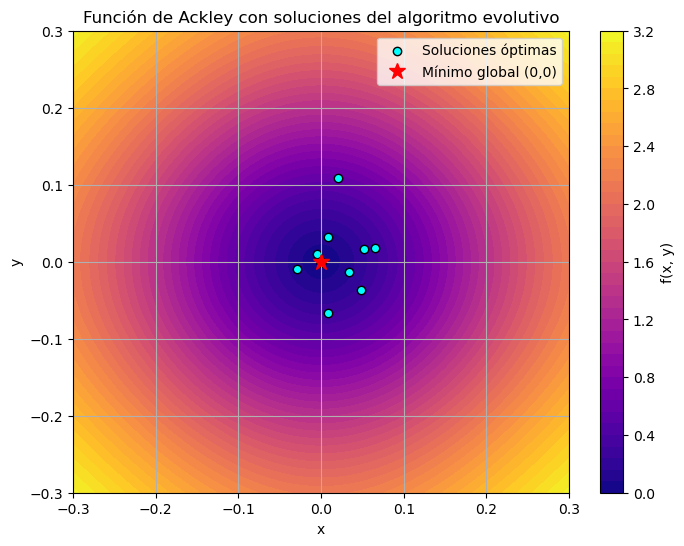

In [37]:
# Malla de puntos para evaluar la función
x_vals = np.linspace(-0.3, 0.3, 400)
y_vals = np.linspace(-0.3, 0.3, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = np.zeros_like(X)

# Evaluar f en cada punto de la malla
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        punto = np.array([X[i, j], Y[i, j]])
        Z[i, j] = f(punto)

# Grafica
plt.figure(figsize=(8, 6))
contours = plt.contourf(X, Y, Z, levels=50, cmap='plasma')
plt.colorbar(contours, label='f(x, y)')

# Soluciones encontradas
plt.scatter(posiciones[:, 0], posiciones[:, 1], color='cyan', edgecolors='black', label='Soluciones óptimas')

# Mínimo global
plt.plot(0, 0, 'r*', markersize=12, label='Mínimo global (0,0)')

plt.title("Función de Ackley con soluciones del algoritmo evolutivo")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


# Comparación Estadística de Algoritmos Evolutivos

Cuando se desea evaluar el rendimiento de diferentes algoritmos evolutivos (como PSO, DE, GA, etc.), es importante usar herramientas estadísticas que permitan determinar si las diferencias observadas son significativas o se deben al azar. A continuación se presenta la teoría para comparar dos algoritmos o tres o más.


## Comparación de **dos algoritmos**

Cuando se tienen **dos algoritmos** y se desea comparar su desempeño (por ejemplo, su valor de función objetivo después de varias ejecuciones), se utilizan tests estadísticos de comparación de medias.

### 1. Test *t* de Student (para muestras pareadas o independientes)

- **Hipótesis nula** ($H_0$): no hay diferencia significativa entre los dos algoritmos.
- **Requisitos**:
  - Datos con distribución **normal**.
  - Varianzas **similares** (puede verificarse con test de Levene o Bartlett).
  - Se recomienda usar muestras **pareadas** si ambos algoritmos se evalúan en los mismos problemas con la misma semilla.
- **Salida**: valor *p*, que indica si rechazar $H_0$.

###  2. Test de Wilcoxon (alternativa no paramétrica)

- Usado si no se cumple la normalidad o se prefiere una prueba **no paramétrica**.
- También sirve para datos pareados.
- Compara la **mediana** en lugar de la media.
- Más robusto frente a distribuciones sesgadas o presencia de outliers.



## Comparación de **tres o más algoritmos**

Cuando se desea comparar **tres o más algoritmos**, se utilizan técnicas que permiten analizar si al menos uno es estadísticamente diferente.

###  1. ANOVA (Análisis de Varianza de una vía)

- **Hipótesis nula** ($H_0$): todas las medias poblacionales son iguales.
- **Requisitos**:
  - Normalidad de los datos.
  - Varianzas homogéneas entre grupos.
- Si el resultado es significativo ($p < 0.05$), al menos un algoritmo es diferente.
- Se recomienda complementarlo con un análisis **post-hoc**.

####  Post-hoc: Tukey HSD

- Permite identificar **cuáles pares** de algoritmos son significativamente distintos.
- Controla el error tipo I al realizar múltiples comparaciones.

###  2. Test de Kruskal-Wallis (alternativa no paramétrica)

- Se usa si no se cumplen los supuestos del ANOVA.
- Hipótesis: las distribuciones de los grupos son iguales.
- Si hay diferencia significativa, se deben realizar comparaciones por pares (por ejemplo, usando el test de Dunn con corrección de Bonferroni).



##  Consideraciones adicionales

- Se recomienda realizar **varias ejecuciones independientes** (mínimo 30) para tener una buena estimación del rendimiento.
- Usar **gráficas** como boxplots o violin plots para visualizar las distribuciones.
- Además de la media o mediana, se pueden analizar otras métricas como la **mejor solución encontrada**, **varianza**, **tiempo de ejecución**, etc.

## Referencias

- García, S., Molina, D., Lozano, M., & Herrera, F. (2009). A study of statistical techniques and performance measures for comparing classifiers. *Pattern Recognition*, 42(3), 354-370.
- Derrac, J., García, S., Molina, D., & Herrera, F. (2011). A practical tutorial on the use of nonparametric statistical tests as a methodology for comparing evolutionary and swarm intelligence algorithms. *Swarm and Evolutionary Computation*, 1(1), 3-18.



# Análisis Estadístico para Comparar Tres Algoritmos

Para evaluar si hay diferencias significativas en el rendimiento de tres algoritmos diferentes, se sigue el siguiente procedimiento estadístico:

### 1. **Prueba de Normalidad (Shapiro-Wilk)**  
Se verifica si los datos de cada algoritmo siguen una distribución normal, lo cual es un supuesto necesario para aplicar el ANOVA.  
- **Hipótesis nula ($H_0$):** Los datos provienen de una distribución normal.  
- Si $p > 0.05$, no se rechaza $H_0$, y podemos asumir normalidad.  

### 2. **Prueba de Homogeneidad de Varianzas (Levene)**  
Se comprueba que la varianza de los datos sea similar entre los grupos (algoritmos).  
- **Hipótesis nula ($H_0$):** Las varianzas son iguales en los grupos.  
- Si $p > 0.05$, se acepta homogeneidad.  

### 3. **Análisis de Varianza (ANOVA) de una vía**  
Se usa para comparar las medias de los tres algoritmos bajo los supuestos de normalidad y varianzas homogéneas.  
- **Hipótesis nula ($H_0$):** Las medias de los tres grupos son iguales (no hay diferencia significativa).  
- Si $p < 0.05$, se rechaza $H_0$, indicando que al menos un algoritmo es diferente.  


### 4. **Alternativa No Paramétrica: Prueba de Kruskal-Wallis**  
Si no se cumplen los supuestos para ANOVA, se utiliza esta prueba que no requiere normalidad.  
- **Hipótesis nula ($H_0$):** Las distribuciones de los grupos son iguales.  
- Si $p < 0.05$, se rechaza $H_0$, indicando diferencias significativas.  


### 5. **Test Post-Hoc (Tukey HSD)**  
Si el ANOVA detecta diferencias, se aplica este test para identificar cuáles pares de algoritmos difieren significativamente, controlando el error tipo I en múltiples comparaciones.  


- Se debe contar con suficientes ejecuciones independientes (usualmente 20 o más) para obtener resultados confiables.  
- Además de la media, evaluar también la varianza y otros indicadores.  
- La estadística permite decidir si las diferencias observadas entre algoritmos son reales o debidas al azar.  


Shapiro-Wilk test para normalidad:
Algoritmo 1: estadístico=0.9529, p-valor=0.4138
Algoritmo 2: estadístico=0.9444, p-valor=0.2903
Algoritmo 3: estadístico=0.9179, p-valor=0.0902

Levene test para igualdad de varianzas: estadístico=1.5544, p-valor=0.2201

ANOVA: estadístico=180.3108, p-valor=0.0000
Kruskal-Wallis: estadístico=50.8772, p-valor=0.0000

Test post-hoc Tukey HSD:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
  alg1   alg2   -0.046   0.0 -0.0574 -0.0346   True
  alg1   alg3    0.044   0.0  0.0326  0.0554   True
  alg2   alg3     0.09   0.0  0.0786  0.1014   True
---------------------------------------------------


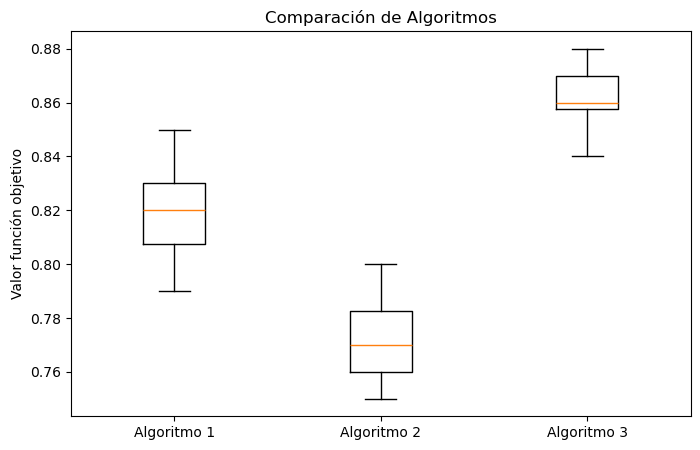

In [43]:
import numpy as np
import scipy.stats as stats
import statsmodels.stats.multicomp as mc
import matplotlib.pyplot as plt

# Datos simulados: valores de función objetivo para 3 algoritmos (cada uno con 20 ejecuciones)
alg1 = np.array([0.82, 0.85, 0.83, 0.79, 0.81, 0.80, 0.82, 0.84, 0.81, 0.83,
                 0.80, 0.79, 0.82, 0.83, 0.85, 0.84, 0.80, 0.81, 0.83, 0.82])

alg2 = np.array([0.78, 0.79, 0.77, 0.76, 0.79, 0.80, 0.78, 0.77, 0.75, 0.76,
                 0.77, 0.79, 0.78, 0.77, 0.76, 0.78, 0.79, 0.77, 0.76, 0.75])

alg3 = np.array([0.84, 0.86, 0.85, 0.88, 0.87, 0.86, 0.85, 0.86, 0.87, 0.88,
                 0.86, 0.85, 0.87, 0.88, 0.86, 0.85, 0.87, 0.88, 0.86, 0.87])

# Unir datos para ANOVA/Kruskal
data = np.concatenate([alg1, alg2, alg3])
groups = ['alg1']*len(alg1) + ['alg2']*len(alg2) + ['alg3']*len(alg3)

# 1) Prueba de normalidad por grupo (Shapiro-Wilk)
print("Shapiro-Wilk test para normalidad:")
for i, d in enumerate([alg1, alg2, alg3], start=1):
    stat, p = stats.shapiro(d)
    print(f"Algoritmo {i}: estadístico={stat:.4f}, p-valor={p:.4f}")

# 2) Prueba de homogeneidad de varianzas (Levene)
stat, p = stats.levene(alg1, alg2, alg3)
print(f"\nLevene test para igualdad de varianzas: estadístico={stat:.4f}, p-valor={p:.4f}")

# 3) ANOVA de una vía
stat, p = stats.f_oneway(alg1, alg2, alg3)
print(f"\nANOVA: estadístico={stat:.4f}, p-valor={p:.4f}")

# Si no se cumple normalidad o homogeneidad, usar Kruskal-Wallis (no paramétrica)
stat_kw, p_kw = stats.kruskal(alg1, alg2, alg3)
print(f"Kruskal-Wallis: estadístico={stat_kw:.4f}, p-valor={p_kw:.4f}")

# 4) Test post-hoc con Tukey HSD si ANOVA es significativa
if p < 0.05:
    print("\nTest post-hoc Tukey HSD:")
    comp = mc.MultiComparison(data, groups)
    post_hoc_res = comp.tukeyhsd()
    print(post_hoc_res.summary())

# Visualización con boxplot
plt.figure(figsize=(8,5))
plt.boxplot([alg1, alg2, alg3], labels=['Algoritmo 1', 'Algoritmo 2', 'Algoritmo 3'])
plt.ylabel('Valor función objetivo')
plt.title('Comparación de Algoritmos')
plt.show()


### Análisis de los resultados estadísticos

**1. Shapiro-Wilk test para normalidad**

- Algoritmo 1: estadístico = 0.9529, p-valor = 0.4138  
- Algoritmo 2: estadístico = 0.9444, p-valor = 0.2903  
- Algoritmo 3: estadístico = 0.9179, p-valor = 0.0902  

*Interpretación:*  
El test indica que no se rechaza la hipótesis nula de normalidad para ninguno de los algoritmos (p > 0.05), por lo que los datos pueden considerarse normalmente distribuidos.



**2. Levene test para igualdad de varianzas**

- Estadístico = 1.5544, p-valor = 0.2201  

*Interpretación:*  
No se rechaza la hipótesis nula de igualdad de varianzas (p > 0.05), lo que indica que las varianzas entre los grupos son homogéneas.



**3. ANOVA**

- Estadístico = 180.3108, p-valor = 0.0000  

*Interpretación:*  
Se rechaza la hipótesis nula de igualdad de medias (p < 0.05), indicando diferencias significativas en las medias entre al menos dos algoritmos.



**4. Kruskal-Wallis (prueba no paramétrica)**

- Estadístico = 50.8772, p-valor = 0.0000  

*Interpretación:*  
Confirma que existen diferencias significativas entre los grupos sin asumir normalidad.



**5. Test post-hoc Tukey HSD**

| Comparación | Diferencia de medias | p-valor ajustado | Intervalo de confianza | Rechazo H0 |
|-------------|---------------------|------------------|------------------------|------------|
| alg1 vs alg2 | -0.046              | 0.000            | [-0.0574, -0.0346]     | Sí         |
| alg1 vs alg3 | 0.044               | 0.000            | [0.0326, 0.0554]       | Sí         |
| alg2 vs alg3 | 0.090               | 0.000            | [0.0786, 0.1014]       | Sí         |

*Interpretación:*  
Todas las diferencias de medias entre pares de algoritmos son estadísticamente significativas.



Los tres algoritmos muestran diferencias estadísticamente significativas en su desempeño, con datos que cumplen las condiciones de normalidad y homogeneidad de varianzas.